# Analysis of sick time taken

dataset info:

Title: OPS workforce demographics

Dataset Source: Ontario Data Catalogue

Dataset URL: https://data.ontario.ca/dataset/ops-workforce-demographics/resource/73a52425-92c0-440e-bad5-badd42edfbe9

Date Accessed: October 12, 2023

In [18]:
# Importing py llibraries

import pandas as pd
import matplotlib.pyplot as plt

In [19]:
# Processing dataset as a py dataframe
df = pd.read_csv('ops_workforce_demographic_dataset_-_2015_to_2023_english.csv', encoding='ISO-8859-1')

# dropping the first two rows so that column titles are at index 0
df.columns = df.iloc[1]
df = df.drop([0, 1]).reset_index(drop=True)

In [20]:
# Exploratory data analysis (EDA)
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())

1       Date FTE Allocation  FTE Actuals Variance # Student FTEs  \
0  31-Mar-15        65167.5      62932.8  -2234.7          511.1   
1  31-Mar-16        65592.5      63139.1  -2453.4          484.1   
2  31-Mar-17        66362.5      63881.8  -2480.7            555   
3  31-Mar-18        67161.8        66569   -592.8          653.6   
4  31-Mar-19        68084.2      65568.3  -2515.9          623.2   

1 # Intern FTEs # Seasonal FTEs # Pending LTIP and Salary Continuance FTEs  \
0         296.5           814.9                                      307.4   
1         286.3           866.7                                      274.5   
2           307           852.9                                        208   
3           371             929                                      245.5   
4           395             912                                      247.8   

1 Total Staff Strength FTEs (basis for remaining columns)  # Regular FTEs  \
0                                            

In [21]:
# Converting features of interest from an object type to a float for analysis

df['Average Sick Credit Days Taken Last Complete Calendar Year'] = df['Average Sick Credit Days Taken Last Complete Calendar Year'].astype(float)
df['Average # Staff with Fewer than 6 Sick Credit Days Taken (As of Last Complete Calendar Year)'] = df['Average # Staff with Fewer than 6 Sick Credit Days Taken (As of Last Complete Calendar Year)'].astype(float)
df['Average # Staff with 6 or More Sick Credit Days (As of Last Complete Calendar Year)'] = df['Average # Staff with 6 or More Sick Credit Days (As of Last Complete Calendar Year)'].astype(float)

# Converting the Date feature into a datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Setting the 'Date' column as the index for time-based plotting.
df.set_index('Date', inplace=True)

C:\Users\vpop\AppData\Local\Temp\ipykernel_2932\3399997133.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


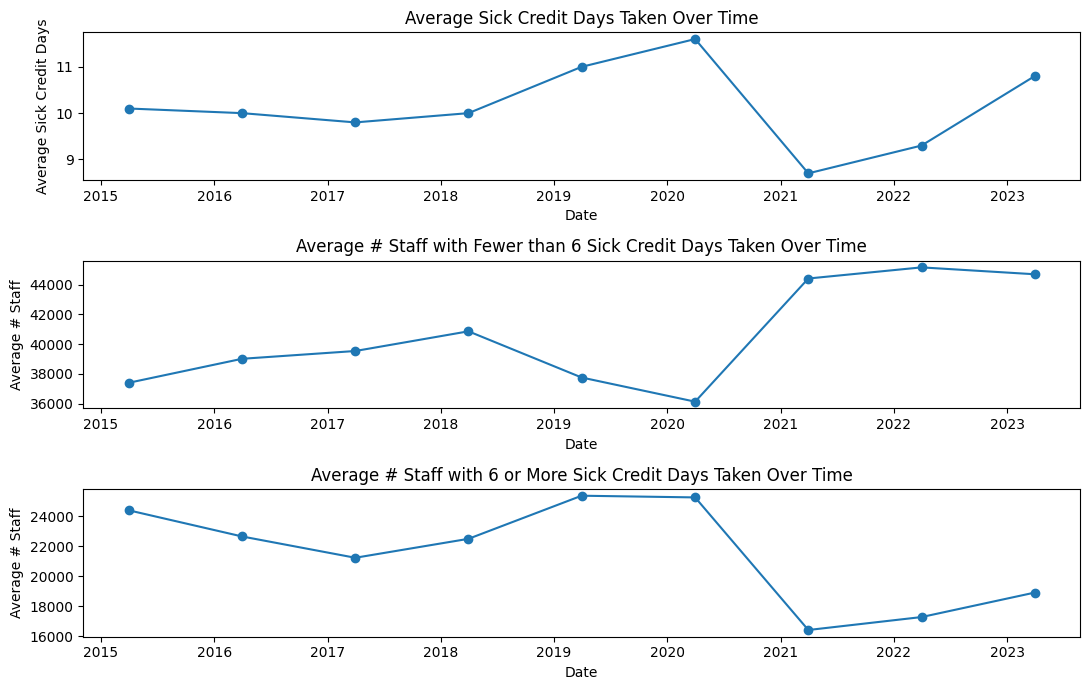

In [22]:
# Plotting features of interest into lineplots

# Creating subplots for each feature
plt.figure(figsize=(11, 7))

# Plotting Average Sick Credit Days Taken
plt.subplot(311)
plt.plot(df.index, df['Average Sick Credit Days Taken Last Complete Calendar Year'], marker='o', linestyle='-')
plt.title('Average Sick Credit Days Taken Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sick Credit Days')

# Plotting Average # Staff with Fewer than 6 Sick Credit Days Taken
plt.subplot(312)
plt.plot(df.index, df['Average # Staff with Fewer than 6 Sick Credit Days Taken (As of Last Complete Calendar Year)'], marker='o', linestyle='-')
plt.title('Average # Staff with Fewer than 6 Sick Credit Days Taken Over Time')
plt.xlabel('Date')
plt.ylabel('Average # Staff')

# Plotting Average # Staff with 6 or More Sick Credit Days Taken
plt.subplot(313)
plt.plot(df.index, df['Average # Staff with 6 or More Sick Credit Days (As of Last Complete Calendar Year)'], marker='o', linestyle='-')
plt.title('Average # Staff with 6 or More Sick Credit Days Taken Over Time')
plt.xlabel('Date')
plt.ylabel('Average # Staff')

# Adjusting subplot spacing
plt.tight_layout()

# Showing the plots
plt.show()
